***features of LSTM without sentiment***
***predict with entity-level sentiment***
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            68096     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 199,809
Trainable params: 199,809
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
4/4 [==============================] - 3s 203ms/step - loss: 0.0300 - val_loss: 0.

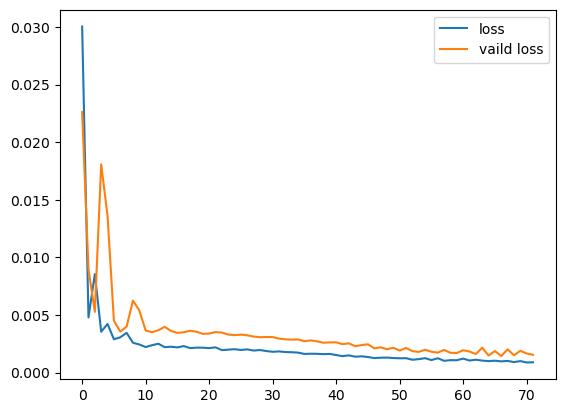

***predict without sentiment***
2/2 [==============================] - 0s 4ms/step
RMSE: 0.11218738140881448

r2_score: 0.7285513778940595


In [1]:
import json
import pandas as pd
import datetime
import time
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from model.lstm_model import get_data,train,get_keras_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from minepy import MINE

# train LSTM without sentiment
df_no_bit = pd.read_csv('./news_data/BTC_USD.csv')
#process date and min max normalization(without sentiment)

for idx,data in df_no_bit.iterrows(): 
    a = data['Date']
    old_time = time.strptime(a, "%m/%d/%Y")
    new_time = time.strftime("%Y-%m-%d", old_time)
    df_no_bit.loc[idx,'Date'] = new_time
df_no_bit = df_no_bit.applymap(lambda x: x.replace(',',''))
df_no_bit = df_no_bit.applymap(lambda x: x.replace('K',''))

df_no_bit.set_index("Date", inplace=True)
df_no = df_no_bit.drop(['Vol.','Change %'],axis=1)
df_no = df_no.fillna(value=0)
    
n_features_no=df_no.shape[1]
lookback = 5
x_train_no, x_val_no, y_train_no, y_val_no,x_test_no,y_test_no = get_data(df_no,lookback,n_features_no)

print("***features of LSTM without sentiment***")
df_no.tail()
print("***predict with entity-level sentiment***")
model_no = get_keras_model(lookback,n_features_no)
train(model_no,lookback,n_features_no,x_train_no,y_train_no,x_val_no,y_val_no)

print("***predict without sentiment***")
y_pred_no = model_no.predict(x_test_no)
print("RMSE:",np.sqrt(mean_squared_error(y_pred_no,y_test_no)))
print("")
print("r2_score:",r2_score(y_pred_no,y_test_no))

***features of LSTM with sequence-level sentiment***
              Price     Open     High      Low  Positive  Negative   Neutral
2022-05-24  29647.0  29091.0  29822.0  28690.0  0.021277  0.319149  0.659574
2022-05-23  29091.0  30283.0  30666.0  28868.0  0.097561  0.365854  0.536585
2022-05-22  30283.0  29439.0  30466.0  29253.0  0.250000  0.250000  0.500000
2022-05-21  29439.0  29202.0  29652.0  28963.0  0.047619  0.190476  0.761905
2022-05-20  29202.0  30329.0  30764.0  28713.0  0.000000  0.666667  0.333333
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            69632     
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
 

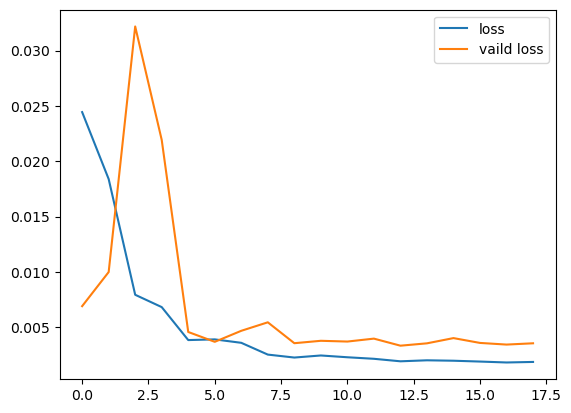

2/2 [==============================] - 0s 3ms/step
RMSE(seq-Sentiment): 0.09549450967188443

r2_score(seq-Sentiment): 0.8669270927502615


In [2]:
from example.finbert_tone_lstm import tone_lstm,get_tone_lstm_data
#load the percentage of sentiment data with price
#get_tone_lstm_data()

# train LSTM with sequence level sentiment associated with bitcoin 
tone_lstm()

***features of LSTM with entity-level sentiment***
              Price     Open     High      Low       pos       neg       neu
2022-05-24  29647.0  29091.0  29822.0  28690.0  0.000000  0.261905  0.738095
2022-05-23  29091.0  30283.0  30666.0  28868.0  0.071429  0.357143  0.571429
2022-05-22  30283.0  29439.0  30466.0  29253.0  0.100000  0.100000  0.800000
2022-05-21  29439.0  29202.0  29652.0  28963.0  0.083333  0.083333  0.833333
2022-05-20  29202.0  30329.0  30764.0  28713.0  0.000000  0.200000  0.800000
***predict with entity-level sentiment***
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            69632     
                                                                 
 dropout_2 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_5 (LSTM)             

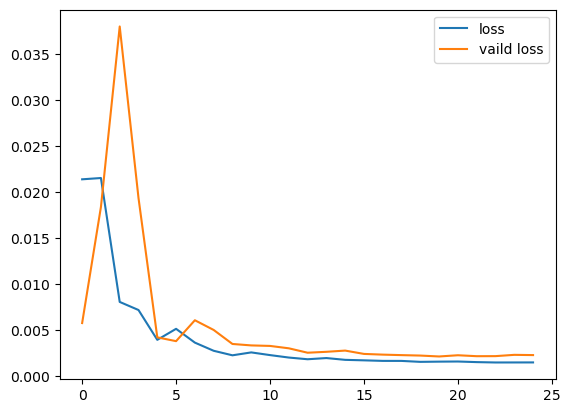

2/2 [==============================] - 1s 3ms/step
RMSE(entity-Sentiment): 0.08502842963521297

r2_score(entity-Sentiment): 0.9024818178911941


In [3]:
# train LSTM with entity level sentiment associated with bitcoin and LSTM without sentiment
from example.finentity_lstm import entity_lstm,finentity_lstm_data
#finentity_lstm_data()
entity_lstm()